In [42]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.patches import RegularPolygon
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colorbar as colorbar

In [2]:
df_river = pd.read_csv('새만금_하천_오염도.csv')
df_river = df_river.iloc[:, 3:]

In [3]:
df_river.iloc[6, 3] = 1000
df_river.iloc[7, 3] = 1000
df_river.iloc[6, 4] = 200
df_river.iloc[7, 4] = 200

In [4]:
df_river.shape

(28, 6)

In [5]:
data = (df_river-np.mean(df_river, axis=0)) / np.std(df_river, axis=0)
data

,BOD(㎎/L),SS(㎎/L),TP(㎎/L),총대장균군수(총대장균군수/100ml),분원성대장균군수,오염도
0,0.259486,2.049072,1.113484,-0.026076,-0.570691,2.088593
1,-0.470551,2.036608,0.530944,1.439472,1.779088,1.414557
2,4.500655,0.142006,0.507642,0.853253,-0.582654,1.286170
3,0.989523,0.840017,1.952342,-0.502380,-0.527968,1.205927
4,0.120431,1.338597,1.229992,-0.187287,1.266409,0.884958
5,0.850469,-0.069890,-0.494327,-0.399791,-0.563856,0.884958
6,0.224722,0.989591,0.903769,-0.539018,-0.442521,0.884958
7,0.433304,1.126700,1.509611,-0.539018,-0.442521,0.884958
8,0.572359,0.590727,1.626119,-0.106681,-0.527968,0.483747
9,-0.053387,0.416225,0.088213,0.120479,-0.092191,0.483747


In [6]:
map_n = [n for n in range(2, 4)]
para_sigma = [np.round(sigma*0.1, 2) for sigma in range(1, 10)]
para_learning_rate = [np.round(learning_rate*0.1, 2) for learning_rate in range(1, 10)]

In [7]:
res = []

for n in map_n:
    for sigma in para_sigma:
        for lr in para_learning_rate:
            try:
                estimator = MiniSom(n, n, 6, sigma=sigma, learning_rate = lr,
                                   topology='hexagonal', random_seed=0)
                estimator.random_weights_init(data.values)
                estimator.train(data.values, 1000, random_order=True)
                qe = estimator.quantization_error(data.values)
                winner_coordinates = np.array([estimator.winner(x) for x in data.values]).T
                cluster_index = np.ravel_multi_index(winner_coordinates, (n, n))
                res.append([str(n) + 'x' + str(n), sigma, lr, 'random_init', qe,
                           len(np.unique(cluster_index))])
                
            except ValueError as e:
                print(e)

In [22]:
df_res = pd.DataFrame(res, columns=['map_size', 'sigma', 'learaning_rate',
                                   'init_method', 'qe', 'n_cluster'])
df_res.sort_values(by=['qe'], ascending=True, inplace=True, ignore_index=True)
df_res[df_res['n_cluster'] == 4]

,map_size,sigma,learaning_rate,init_method,qe,n_cluster
81,2x2,0.9,0.5,random_init,1.169116,4
82,2x2,0.9,0.4,random_init,1.169709,4
83,2x2,0.7,0.5,random_init,1.169744,4
84,2x2,0.8,0.5,random_init,1.169914,4
85,2x2,0.8,0.4,random_init,1.170042,4
...,...,...,...,...,...,...
157,2x2,0.3,0.4,random_init,1.322381,4
158,2x2,0.4,0.4,random_init,1.322381,4
159,2x2,0.1,0.1,random_init,1.329264,4
160,2x2,0.2,0.1,random_init,1.329264,4


<AxesSubplot:>

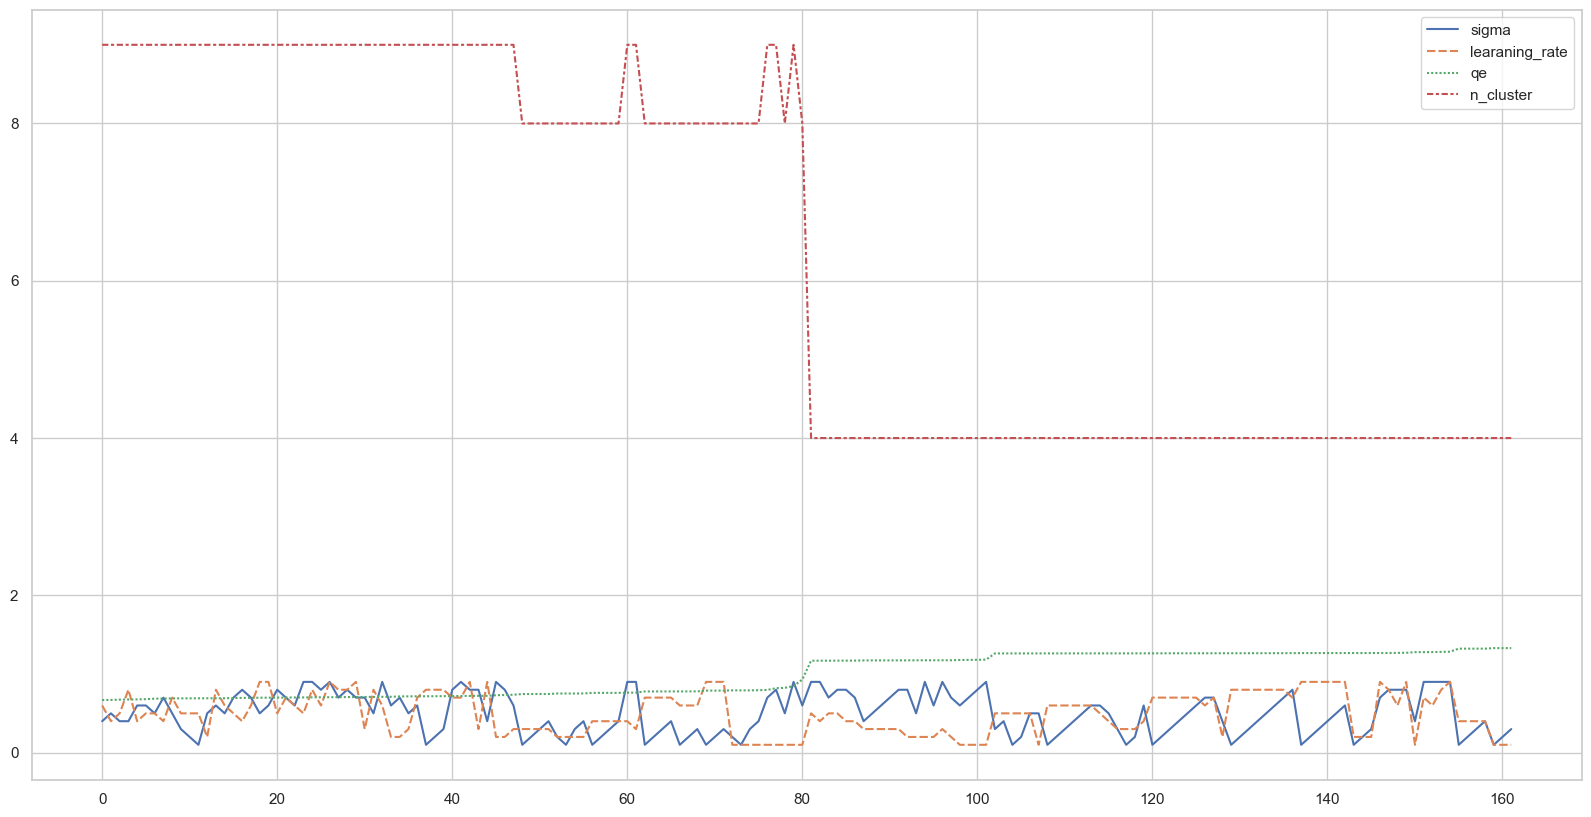

In [26]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = df_res)

In [27]:
som_b2 = MiniSom(2, 2, 6, sigma=0.9, learning_rate=0.5, topology='hexagonal',
                neighborhood_function='gaussian', activation_distance='euclidean',
                random_seed=0)
som_b2.random_weights_init(data.values)
som_b2.train(data.values, 1000, random_order=True)

In [24]:
som_b2.quantization_error(data.values)

1.1691162001956281

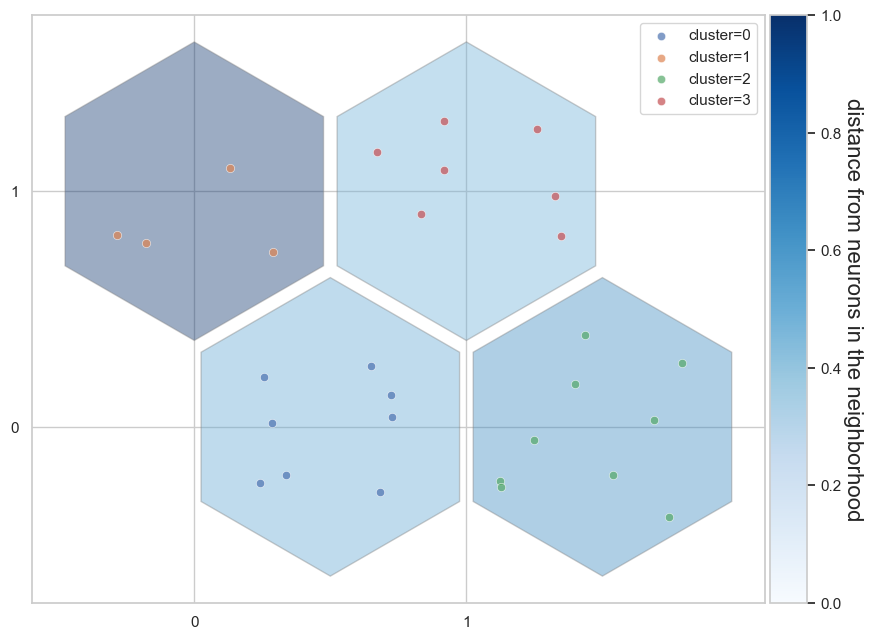

In [47]:
xx, yy = som_b2.get_euclidean_coordinates()
umatrix = som_b2.distance_map()
weights = som_b2.get_weights()
winner_coordinates = np.array([som_b2.winner(x) for x in data.values]).T
cluster_index = np.ravel_multi_index(winner_coordinates, (2, 2))

f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(111)
ax.set_aspect('equal')

for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * 2 / np.sqrt(3) * 3 / 4
        hex = RegularPolygon((xx[(i, j)], wy),
                            numVertices=6,
                            radius=.95 / np.sqrt(3),
                            facecolor=cm.Blues(umatrix[i, j]),
                            alpha=.4,
                            edgecolor='gray')
        plot = ax.add_patch(hex)
        

for c in np.unique(cluster_index):
    x_ = [som_b2.convert_map_to_euclidean(som_b2.winner(x))[0] + (2*np.random.rand(1)[0]-1)*0.4 
         for x in data.values[cluster_index==c]]
    y_ = [som_b2.convert_map_to_euclidean(som_b2.winner(x))[1] + (2*np.random.rand(1)[0]-1)*0.4 
         for x in data.values[cluster_index==c]]
    y_ = [(i*2 / np.sqrt(3) * 3 / 4) for i in y_]
    plot = sns.scatterplot(x=x_, y=y_, label='cluster='+str(c), alpha=.7)

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plot = plt.xticks(xrange-.5, xrange)
plot = plt.yticks(yrange * 2 / np.sqrt(3) * 3 / 4, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues,
                           orientation='vertical', alpha=.4)

cb1.ax.get_yaxis().labelpad = 16
plot = cb1.ax.set_ylabel('distance from neurons in the neighborhood',
                        rotation=270, fontsize=16)
plot = plt.gcf().add_axes(ax_cb)

plt.savefig('som_visualization.png')

In [45]:
cnt = []
for c in np.unique(cluster_index):
    count_c = len(data[cluster_index==c])
    cnt.append([c, count_c])
    
df_cnt = pd.DataFrame(cnt, columns=['cluster이름', '개수'])
df_cnt

,cluster이름,개수
0,0,8
1,1,4
2,2,9
3,3,7


In [46]:
cluster_index

array([3, 1, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
df_river = pd.read_csv('새만금_하천_오염도.csv')
df_river['Cluster'] = cluster_index
df_river[df_river['Cluster'] == 3]

,측정소명,년,월,BOD(㎎/L),SS(㎎/L),TP(㎎/L),총대장균군수(총대장균군수/100ml),분원성대장균군수,오염도,Cluster
0,동진강2,2023,5,3.8,28.5,0.117,8000.0,50.0,3.75,3
2,원평천1,2023,5,16.0,13.2,0.091,20000.0,36.0,3.25,3
3,용암천,2023,5,5.9,18.8,0.153,1500.0,100.0,3.20,3
4,용호천,2023,5,3.4,22.8,0.122,5800.0,2200.0,3.00,3
6,고부천3,2023,5,3.7,20.0,0.108,NaN,NaN,3.00,3
7,원평천3,2023,5,4.3,21.1,0.134,NaN,NaN,3.00,3
8,마산천,2023,5,4.7,16.8,0.139,6900.0,100.0,2.75,3


In [56]:
df_river.to_csv('새만금_하천_Cluster.csv')